In [67]:
import overpy
import geopandas as gpd
import geojson
import matplotlib.pyplot as plt
import requests
import osm2geojson

In [125]:
api = overpy.Overpass()

# fetch all ways and nodes
overpass_url = "http://overpass-api.de/api/interpreter"
query = """
    [out:json];
    (
    way(51.528, -0.101, 51.534, -0.091) ["leisure"="park"];
    way(51.528, -0.101, 51.534, -0.091) ["building"];
    );
    (._;>;);
    out geom;
    """

response = requests.get(overpass_url, params={'data': query})
if response.status_code == 200:
    # convert result to GeoDataFrame
    data = response.json()
    geojson = osm2geojson.json2geojson(data)
    geojsonDF = gpd.GeoDataFrame.from_features(geojson)

https://overpass-turbo.eu/s/1HVm

In [126]:
geojsonDF

,geometry,type,id,tags,nodes
0,POINT (-0.10083 51.52914),node,26507087,NaN,NaN
1,POINT (-0.09199 51.53110),node,245406667,NaN,NaN
2,POINT (-0.09699 51.53306),node,245406678,NaN,NaN
3,POINT (-0.09406 51.53145),node,277703362,NaN,NaN
4,POINT (-0.09151 51.52851),node,277703365,NaN,NaN
...,...,...,...,...,...
3349,"POLYGON ((-0.09613 51.52826, -0.09616 51.52831...",way,1187839960,"{'addr:housename': 'Sienna House', 'building':...","[11030002373, 11030002399, 11030002372, 110300..."
3350,"POLYGON ((-0.09560 51.52891, -0.09553 51.52889...",way,1187839962,"{'addr:city': 'London', 'addr:housename': 'Val...","[11030002365, 5184261760, 11030002350, 1103000..."
3351,"POLYGON ((-0.09439 51.52869, -0.09442 51.52868...",way,1187869335,"{'building': 'apartments', 'building:levels': ...","[11030268174, 5184261773, 11030035625, 1103003..."
3352,"POLYGON ((-0.09476 51.52939, -0.09480 51.52939...",way,1189601698,"{'building': 'roof', 'layer': '1'}","[11046135389, 6810295404, 6810302825, 11046135..."


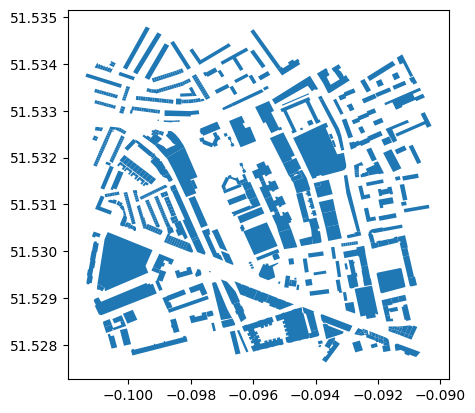

In [127]:
geojsonDF.plot(markersize=0)
plt.gca().set_aspect(1.5)
plt.show()